# Working with U.S. Census Data in Python Using `censusdis`

## Background and History

<table>
    <tr>
        <td rowspan="3" width="240">
            <a href="https://www.communitycoalitiononrace.org/" target="_blank">
              <img src="./images/communitycoalitiononrace_logo.png" alt="Community Coalition on Race Logo" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2020</td>
        <td style="font-size:16pt">
            CCR migrated from CD-ROM and spreadsheet census data to the US. Census API using 
            the <a href="https://github.com/jtleider/censusdata">censusdata</a> Python package
            and some internal interface code.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2021</td>
        <td style="font-size:16pt">
            Developed <a href="https://github.com/vengroff/divintseg">divintseg</a>, Python
            package for computing diversity, integration, and segregation metrics.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2022</td>
        <td style="font-size:16pt">
            Censusdata support ended. We rewrote CCR's internal interface as the open source <a href="https://github.com/vengroff/censusdis">censusdis</a> package to load data and compute dis metrics. We added mapping and other utilities to make it a one stop shop.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://www.twosigma.com/" target="_blank">
                <img src="./images/ts-logo.svg" alt="Two Sigma Logo" width="200"/>
            </a>
            <br/>
            <a href="https://www.twosigma.com/data-clinic/" target="_blank">
                <img src="./images/logo-ts-data-clinic.png" alt="TS Data Clinic Logo" width="200"/>
            </a>
            <br/>
            <a href="https://housingnavigatorma.org/" target="_blank">
                <img src="./images/housing-nav-logo.svg" alt="mybinder.org" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            Used censusdis along with proprietary data to analyze affordable
            housing availability and need in Massachusetts.
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <a href="https://datapinions.com/" target="_blank">
                <img src="https://datapinions.com/wp-content/uploads/2023/02/cropped-favicon512.png" alt="Datapinions" width="100"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            <a href="http://di-map.datapinions.com/">http://di-map.datapinions.com/</a>.
            A nationwide interactive map of diversity and integration built with censusdis.
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <a href="https://pydata.org/seattle2023/" target="_blank">
                <img src="https://pydata.org/seattle2023/wp-content/uploads/2022/10/PyData_logo.png" alt="Datapinions" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2023</td>
        <td style="font-size:16pt">
            PyData Seattle tutorial introduces `censusdis` to the world.
        </td>
    </tr>
    <tr>
        <td>
        </td>
        <td style="font-size:24pt">2024</td>
        <td style="font-size:16pt">
            Version 1.0.0 of `censusdis` is released.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://facctconference.org/2024/" target="_blank">
                <img src="./images/facct2024logo.png" alt="ACM FAccT 2024 Logo" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2024</td>
        <td style="font-size:16pt">
            Impact charts paper at ACM FAccT 2024.
        </td>
    </tr>
</table>
    

# Outline

  - ## Our first query—diving right in 
  - ## Extending the example
    - ### Data
    - ### Geographies
    - ### Maps
  - ## Metadata and data discovery


# Our first, "Hello, World," query

We will query
 - the **American Community Survey 5-Year Data** (*data set*)
 - **2020** (*vintage*) 
 - for **median household income** (*variable*)
 - in **New Jersey** (*geography*).
 
Using
 - [`censusdis.data.download`](https://censusdis.readthedocs.io/en/latest/data.html#censusdis.data.download),
the workhorse API of censusdis

In [1]:
import censusdis.data as ced
from censusdis.datasets import ACS5
from censusdis.states import NJ

df_nj_income = ced.download(
    
    # Data set: American Community Survey 5-Year
    dataset=ACS5,
    
    # Vintage: 2022
    vintage=2022, 
    
    # Variable: median household income
    download_variables='B19013_001E', 
    
    # Geography: New Jersey
    state=NJ
)

df_nj_income

,STATE,B19013_001E
0,34,97126


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Interpreting the Results

We asked for data from a single geography, New Jersey, so the return value is a data frame with only one row.

The data frame has two columns:
 - `STATE`, the [FIPS code](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) for Washington State. This is also the value of `censusdis.states.WA`.
 - `B19013_001E`, the value of variable we asked for, which is an estimate of median household income<sup>*</sup>.
 
So, according to this data, the median household income in New Jersey in 2022 was $97,126.
 
<sup>*</sup>How did we know that that variable was? More on that to come...

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extending Hello World: More than One State

We don't have to limit our queries to just a single geography.

We can query several states at once.

In [2]:
import censusdis.states as states

df_tri_state_income = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables='B19013_001E', 
    
    # Three states this time.
    state=[states.NY, states.NJ, states.CT]  
)

df_tri_state_income

,STATE,B19013_001E
0,09,90213
1,34,97126
2,36,81386


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: More than One Variable

We can also query several variables at once.

We'll add the variable `NAME` to our query so it is easier for those of us who don't dream in FIPS codes to know what state each row represents.

In [3]:
df_tri_state_income = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    
    # Name and median household income
    download_variables=['NAME', 'B19013_001E'],  
    
    state=[states.NY, states.NJ, states.CT]  
)

df_tri_state_income

,STATE,NAME,B19013_001E
0,36,New York,71117
1,09,Connecticut,79855
2,34,New Jersey,85245


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: All the states

We can use `'*'` as a wildcard to get all known geographies of a given
type.

In [4]:
df_all_states = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
    
    # Wild card for all the states
    state='*'
)

df_all_states

,STATE,NAME,B19013_001E
0,42,Pennsylvania,63627
1,06,California,78672
2,54,West Virginia,48037
3,49,Utah,74197
4,36,New York,71117
5,11,District of Columbia,90842
6,02,Alaska,77790
7,12,Florida,57703
8,45,South Carolina,54864
9,38,North Dakota,65315


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## The results of our queries are ordinary pandas [DataFrames](https://pandas.pydata.org/docs/reference/frame.html)

So we can do whatever analysis we might normally do with a data frame.
For example, what are the top ten states by median income?

In [5]:
df_all_states.nlargest(10, 'B19013_001E')

,STATE,NAME,B19013_001E
5,11,District of Columbia,90842
30,24,Maryland,87063
29,34,New Jersey,85245
23,25,Massachusetts,84385
21,15,Hawaii,83173
20,09,Connecticut,79855
1,06,California,78672
13,33,New Hampshire,77923
6,02,Alaska,77790
35,53,Washington,77006


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

Or the bottom ten?

In [6]:
df_all_states.nsmallest(10, 'B19013_001E')

,STATE,NAME,B19013_001E
48,72,Puerto Rico,21058
39,28,Mississippi,46511
2,54,West Virginia,48037
34,05,Arkansas,49475
17,22,Louisiana,50800
45,35,New Mexico,51243
12,01,Alabama,52035
49,21,Kentucky,52238
37,40,Oklahoma,53840
51,47,Tennessee,54833


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query Geometry along with Data

Often, we'd like to plot our data on a map. So we need to know what each state looks like and where it is.
We can add `with_geometry=True` to our query to get what we need.

- The return value is now a `geopandas.GeoDataFrame`
- This is an extension of a `pandas.DataFrame` that adds `geometry` to each row.

In [7]:
gdf_all_states = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
    
    state='*',
    
    # We want the geometry of the states too:
    with_geometry=True
)

gdf_all_states.head()

,STATE,NAME,B19013_001E,geometry
0,42,Pennsylvania,63627,"POLYGON ((-80.51989 40.90666, -80.51963 40.911..."
1,06,California,78672,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
2,54,West Virginia,48037,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
3,49,Utah,74197,"POLYGON ((-114.05296 37.59278, -114.05247 37.6..."
4,36,New York,71117,"MULTIPOLYGON (((-79.76215 42.24305, -79.76196 ..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Results on a Map

- `cem.plot_us` 
  - Conveniently projects the United States
  - Relocates AK, HI, and PR for a more compact display

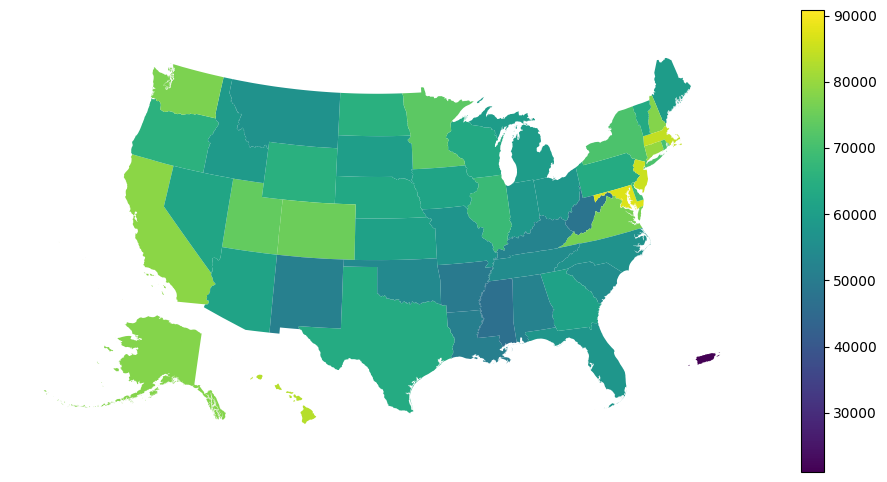

In [8]:
import censusdis.maps as cem

ax = cem.plot_us(
    gdf_all_states,
    'B19013_001E',
    
    # The **kwargs here are standard Matplotlib **kwargs
    legend=True,
    figsize=(12, 6)
)

ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Styling the Map

- We can add a variety of styling to the map.
- Any args Matplotlib can take, we can pass through.

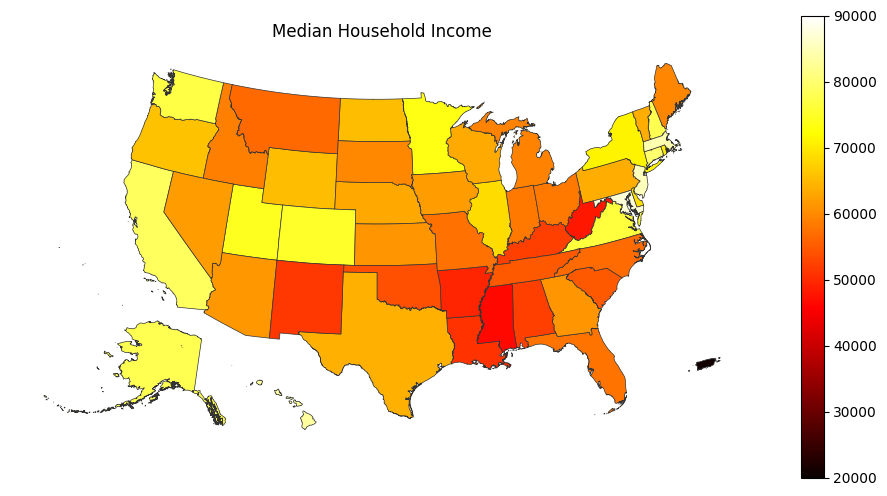

In [9]:
ax = cem.plot_us(
    gdf_all_states,
    'B19013_001E',

    # Styling with Matplotlib **kwargs
    cmap='hot',
    edgecolor='#333',
    linewidth=0.5,
    vmin=20_000,
    vmax=90_000,
        
    legend=True,
    figsize=(12, 6)
)

ax.set_title("Median Household Income")
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## What other Geographies are Available?

## What other Geographies are Available?

### Start with States
Just as we have already done.

In [10]:
gdf_states = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the states, as we have done before
    state="*",
    
    with_geometry=True  
)

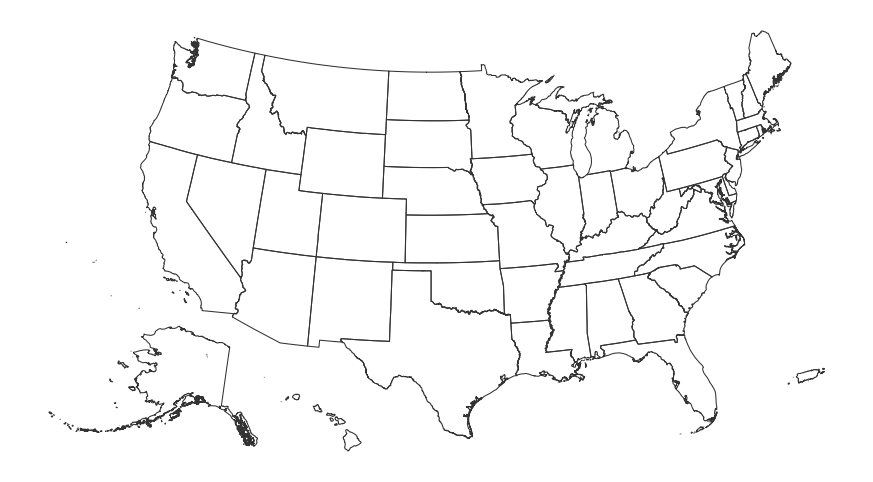

In [11]:
ax = cem.plot_us_boundary(gdf_states, linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Counties

We choose the state but use the wildcard `county='*'`.

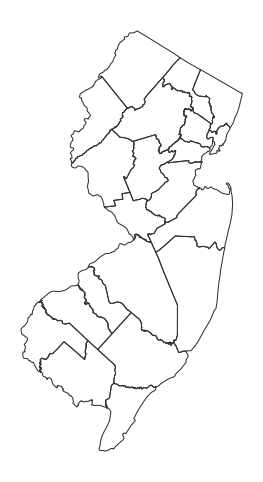

In [12]:
gdf_counties = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the counties in Washington State.
    state=states.NJ,
    county="*",
    
    with_geometry=True
)

ax = cem.plot_map(gdf_counties.boundary, linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Find Essex County

In [13]:
gdf_counties[gdf_counties['NAME'].str.startswith("Essex")]

,STATE,COUNTY,NAME,geometry
11,34,013,"Essex County, New Jersey","POLYGON ((-74.37623 40.76275, -74.37389 40.762..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Census Tracts

- Tracts typically have 1-5,000 residents
- There are ~80,000 tracts in the U.S.

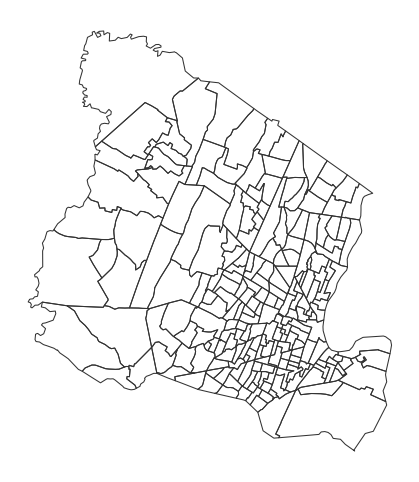

In [14]:
from censusdis.counties.new_jersey import ESSEX

gdf_tracts = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the census tracts in Essex County
    state=NJ,
    county=ESSEX,
    tract="*",
    
    with_geometry=True
)

ax = cem.plot_map(
    gdf_tracts.boundary,
    linewidth=0.75, 
    color='#333', 
    figsize=(12, 6),
)

ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Block Groups

- This is the finest level of geography in ACS data.

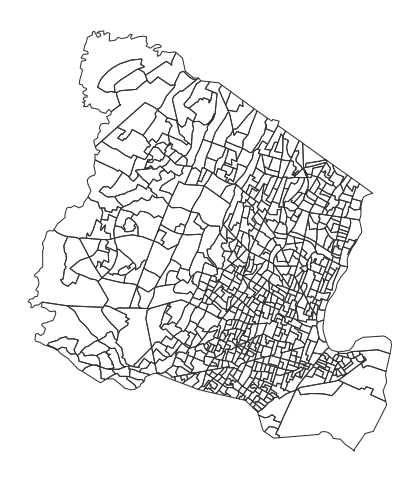

In [15]:
df_block_group = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the block groups in King County, WA
    state=states.NJ,
    county=ESSEX,
    tract="*",
    block_group="*",
    
    with_geometry=True
)

ax = cem.plot_map(
    df_block_group.boundary, 
    linewidth=0.75, 
    color='#333', 
    figsize=(12, 6),
)
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Plot Data at the Block Group Level

In [16]:
from censusdis.values import ALL_SPECIAL_VALUES

gdf_block_group = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
   
    state=states.NJ,
    county=ESSEX,
    tract="*",
    block_group="*",
    
    with_geometry=True,
    
    # The census API puts in some special values like
    # -666666666 to indicate that data is missing for
    # any of several reasons. For now, we will just
    # set all of these special values to NaN.
    set_to_nan=ALL_SPECIAL_VALUES
)

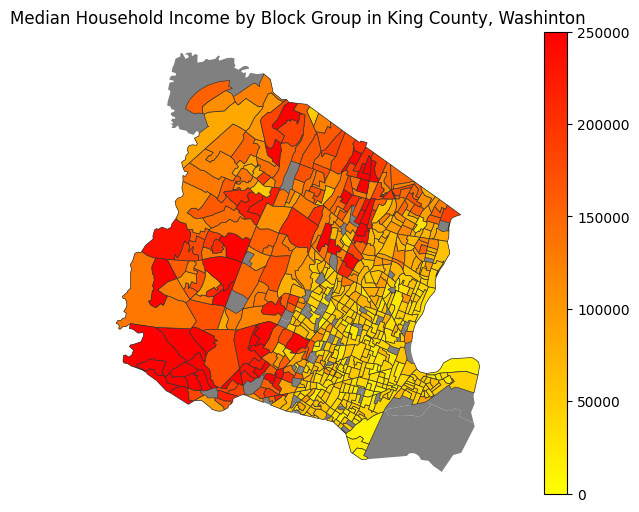

In [17]:
# First plot a neutral background color everywhere.
ax = cem.plot_map(
    gdf_block_group,
    color='gray',
    figsize=(12, 6)
)

# On top of that, plot median housuehold income
# for the non-NaN block groups.
ax = cem.plot_map(
    gdf_block_group,
    'B19013_001E',

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    vmin=0,
    vmax=250_000,
        
    legend=True,
    ax=ax,
)

ax.set_title("Median Household Income by Block Group in King County, Washinton")
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Off-Spine Geography (And our first foray into metadata)

- *State - County - Tract - Block Group*, are referred to as *on-spine* geographies
- Not all geographies nest and cover all areas like on-spine geographies do.
- Those that don't are called *off-spine* geographies.
- We can query all available nested geometries, on and off-spine.
- All are valid combinations of geography kwargs.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<img src="./images/census_geos.png" alt="Census Geographies">

More details at https://www.census.gov/content/dam/Census/data/developers/geoareaconcepts.pdf.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Query for geographies available for a dataset

Each element is a list that tells us a valid combination
of geography `kwargs`.

In [18]:
list(ced.geographies(ACS5, 2022))

[['us'],
 ['region'],
 ['division'],
 ['state'],
 ['state', 'county'],
 ['state', 'county', 'county_subdivision'],
 ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 ['state', 'county', 'tract'],
 ['state', 'county', 'tract', 'block_group'],
 ['state', 'place', 'county_or_part'],
 ['state', 'place'],
 ['state', 'consolidated_city'],
 ['state', 'consolidated_city', 'place_or_part'],
 ['state', 'alaska_native_regional_corporation'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_subdivision_remainder'],
 ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_census_tract'],
 ['american_indian_area_alaska_native_area_hawaiian_home

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Places in New Jersey

- `['state', 'place']` was one of the entries in the list above. 
- It tells us that `state=` and `place=` are 
valid keywords to describe a geography.
- We will use them in the query below.
- Places are off-spine, so
  - Places do not cover the entire area of the state the way on-spine geometries do.
  - Every part of the state is in a county, a census tract, and a block group.
  - Not every part of the state is in a place.

In [19]:
gdf_nj_places = ced.download(
    'acs/acs5',
    2020,
    ['NAME', 'B19013_001E'], 
   
    # Query all places in New Jersey.
    state=states.NJ,
    place='*',
    
    with_geometry=True
)

gdf_nj_places.head()

,STATE,PLACE,NAME,B19013_001E,geometry
0,34,74478,"Union CDP, New Jersey",92232.0,"POLYGON ((-74.27640 40.69789, -74.27444 40.699..."
1,34,74540,"Union Beach borough, New Jersey",109512.0,"POLYGON ((-74.18962 40.44223, -74.18712 40.442..."
2,34,74630,"Union City city, New Jersey",49457.0,"POLYGON ((-74.04450 40.75929, -74.04443 40.759..."
3,34,74930,"Upper Greenwood Lake CDP, New Jersey",104769.0,"POLYGON ((-74.40313 41.17535, -74.40192 41.176..."
4,34,75020,"Upper Montclair CDP, New Jersey",214726.0,"POLYGON ((-74.21902 40.83573, -74.21624 40.839..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot places

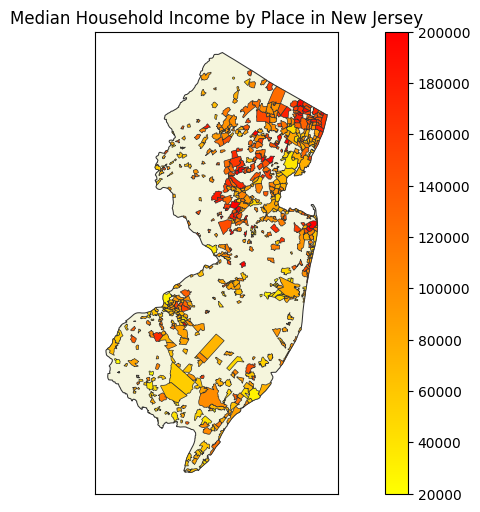

In [20]:
# Plot the whole state in a background color.
gdf_nj_state = gdf_states[gdf_states['STATE']==states.NJ]

ax = cem.plot_map(
    gdf_nj_state, linewidth=0.75, color='beige', edgecolor='#333', figsize=(12, 6)
)

# Plot the places on top.
ax = cem.plot_map(
    gdf_nj_places,
    'B19013_001E',

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    
    vmin=20_000,
    vmax=200_000,
        
    figsize=(12, 6),
    legend=True,
    
    ax=ax
)

_ = ax.set_title("Median Household Income by Place in New Jersey")

#### Or if you prefer a background map

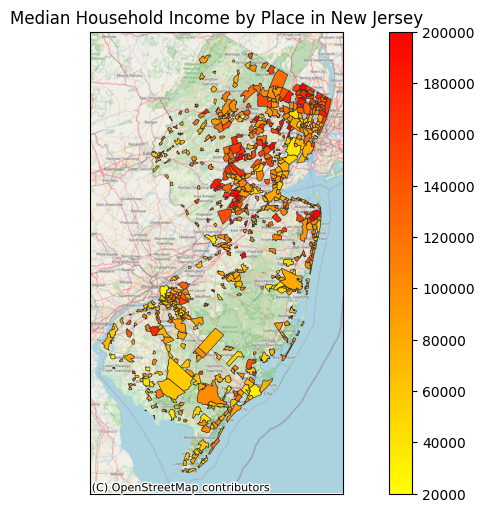

In [21]:
ax = cem.plot_map(
    gdf_nj_places,
    'B19013_001E',

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    
    vmin=20_000,
    vmax=200_000,
        
    figsize=(12, 6),
    legend=True,
    
    # Add a background map from Open Street Maps
    with_background=True
)

_ = ax.set_title("Median Household Income by Place in New Jersey")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Query Core Based Statistical Areas (CBSAs) in the United States

- Metropolitan (population 50,000+) and Micropolitan (population 10,000-50,000) areas are collectively know as [Core Based Statistical Areas](https://en.wikipedia.org/wiki/Core-based_statistical_area) (CBSAs)
- Our list of geographies included `['metropolitan_statistical_area_micropolitan_statistical_area']`
- Note that this was standalone, not nested in a state like `place` was.
- CBSAs represent greater micro/metropolitan areas
- They may cross state lines

In [22]:
gdf_cbsa = ced.download(
    dataset=ACS5,
    vintage=2020,
    
    # Note: 'B03002_001E' is the variable for total population.
    download_variables=['NAME', 'B19013_001E', 'B03002_001E'], 
   
    # Query all CBSAs in the country.
    metropolitan_statistical_area_micropolitan_statistical_area='*',
    
    with_geometry=True
)

In [23]:
# We want the n largest CBSAs by population.
n = 100
gdf_large_cbsa = gdf_cbsa.nlargest(n, 'B03002_001E')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Largest CBSAs

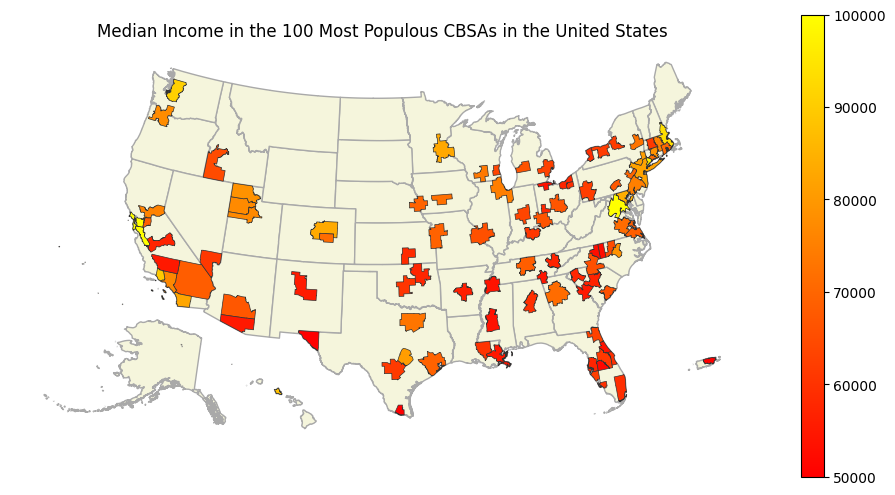

In [24]:
ax = cem.plot_us(
    gdf_states,
    color='beige',
    edgecolor='darkgrey',
    figsize=(12,6)
)

ax = cem.plot_us(
    gdf_large_cbsa,
    'B19013_001E',

    cmap='autumn',
    edgecolor='#333',
    linewidth=0.5,
    vmin=50_000,
    vmax=100_000,
        
    legend=True,
    
    ax=ax
)

ax.axis('off')
_ = ax.set_title(f'Median Income in the {n} Most Populous CBSAs in the United States')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Putting On and Off-Spine Geometries Together

<img src="./images/census_geos_place_tract.png" alt="Path to Census Geographies Place and Tract">

This can be inconvenient if we want, for example, 
all tracts in a place.

### Example: All census tracts in Baltimore, MD

### Option I: Do it manually (hint: this is the hard way)

1. Query all tracts in Maryland, with geometry;
2. Query the geometry of Baltimore;
3. See which tracts are within Baltimore.

In [25]:
# Step 1: All tracts in Maryland.

gdf_md_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=["NAME", "B19013_001E"],

    # These are the geometries we want data for, but only for the ones contained
    # in the outer geometry.
    state=states.MD,
    county="*",
    tract="*",

    with_geometry=True,
)

In [26]:
# Step 2: Baltimore
from censusdis.places.maryland import BALTIMORE_CITY

gdf_balmtimore_geo = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=["NAME"],

    state=states.MD,
    place=BALTIMORE_CITY,

    with_geometry=True
)

In [27]:
# Visual verification

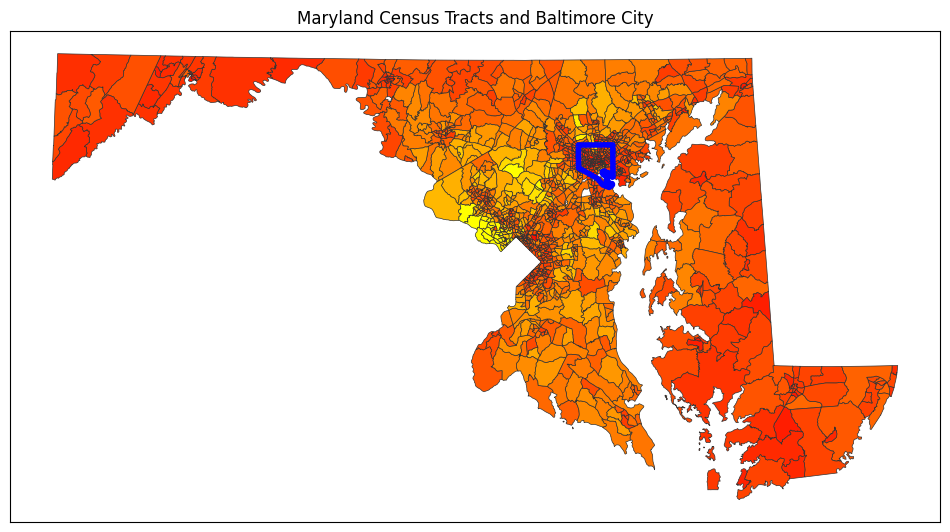

In [28]:
ax = cem.plot_map(
    gdf_md_tracts,

    'B19013_001E',

    cmap='autumn',
    edgecolor='#333',
    linewidth=0.5,
        
    figsize=(12, 8)
)

ax = cem.plot_map(
    gdf_balmtimore_geo.boundary,
    
    color='blue',
    linewidth=4.0,

    # Plot on top of the Maryland tracts.
    ax=ax,
    zorder=10,
)

_ = ax.set_title("Maryland Census Tracts and Baltimore City")

In [29]:
gdf_baltimore_tracts_contained = gdf_md_tracts.sjoin(
    gdf_balmtimore_geo,
)

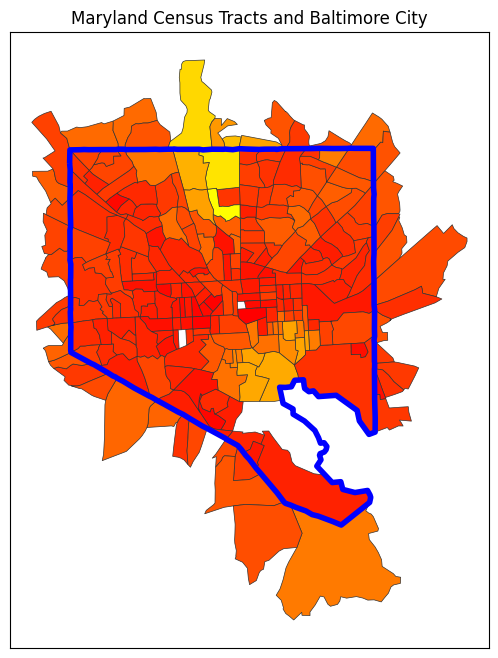

In [30]:
ax = cem.plot_map(
    gdf_baltimore_tracts_contained,
    'B19013_001E',

    cmap='autumn',
    edgecolor='#333',
    linewidth=0.5,
        
    figsize=(12, 8)
)

ax = cem.plot_map(
    gdf_balmtimore_geo.boundary,
    
    color='blue',
    linewidth=4.0,

    # Plot on top of the Maryland tracts.
    ax=ax,
    zorder=10,
)

_ = ax.set_title("Maryland Census Tracts and Baltimore City")

In [31]:
gdf_baltimore_tracts_contained = gdf_md_tracts.sjoin(
    gdf_balmtimore_geo,
    # This is the predicate we forgot:
    predicate='within',
)

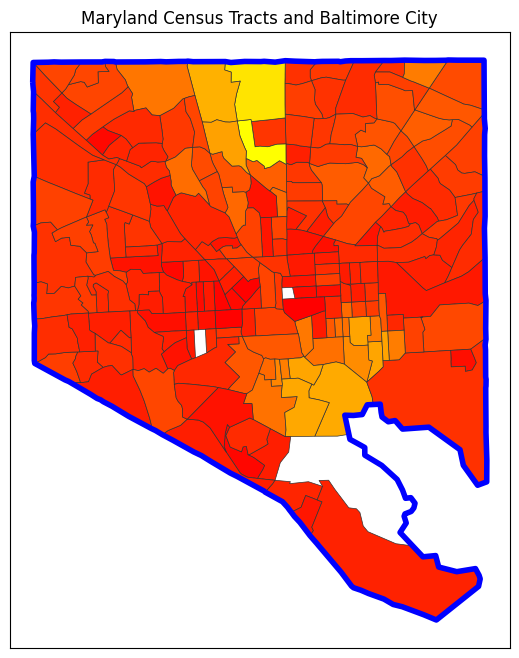

In [32]:
ax = cem.plot_map(
    gdf_baltimore_tracts_contained,
    'B19013_001E',

    cmap='autumn',
    edgecolor='#333',
    linewidth=0.5,
        
    figsize=(12, 8)
)

ax = cem.plot_map(
    gdf_balmtimore_geo.boundary,
    
    color='blue',
    linewidth=4.0,

    ax=ax,
    zorder=10,
)

_ = ax.set_title("Maryland Census Tracts and Baltimore City")

### Option II: The Easy Way - Let `ced.contained_within` do the work

In [33]:
gdf_baltimore_tracts = ced.contained_within(
    # This is the outer geometry that we want all of our results to be within.
    state=states.MD,
    place=BALTIMORE_CITY
).download(
    # This looks like the arguments to an ordinary `ced.download`
    # but the results will be restricted to those contained within
    # Baltimore City.
    dataset=ACS5,
    vintage=2022,
    download_variables=["NAME", "B19013_001E"],

    # These are the geometries we want data for, but only for the ones contained
    # in the outer geometry.
    state="*",
    county="*",
    tract="*",

    with_geometry=True,

    # Make the geometries look a little nicer by
    # removing water (mainly Chesapeake Bay in this 
    # case).
    remove_water=True,
)

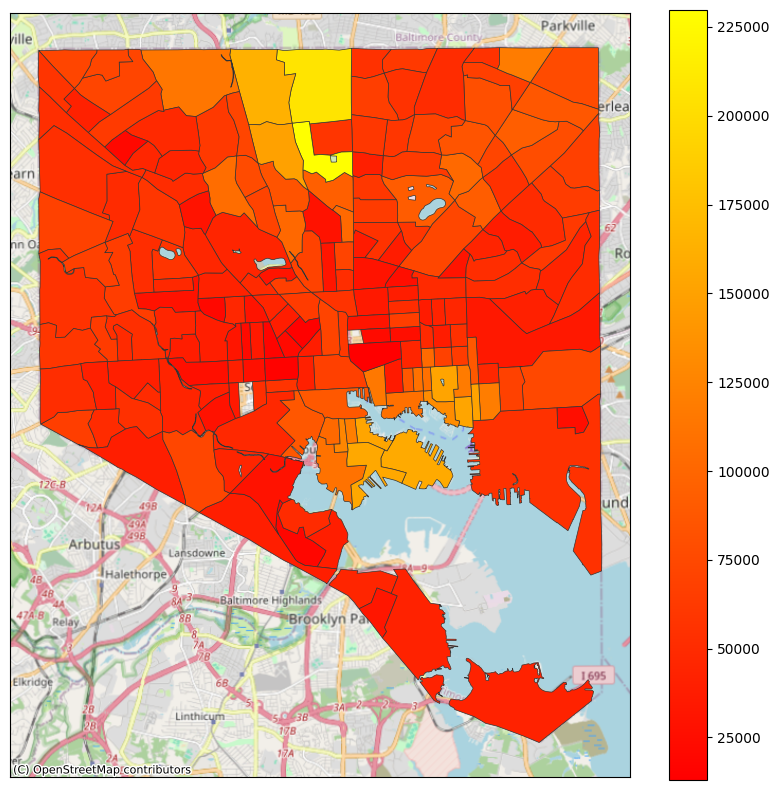

In [34]:
ax = cem.plot_map(
    gdf_baltimore_tracts,

    'B19013_001E',

    cmap='autumn',
    edgecolor='#333',
    linewidth=0.5,
    
    legend=True,
    with_background=True,

    figsize=(10, 10)
)
